<a href="https://colab.research.google.com/github/AIML-ankit/Explainable-AI/blob/main/Explainable_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install interpret

     |████████████████████████████████| 6.6 MB 4.0 MB/s 
     |████████████████████████████████| 756 kB 67.8 MB/s 
     |████████████████████████████████| 275 kB 62.1 MB/s 
     |████████████████████████████████| 793 kB 51.9 MB/s 
     |████████████████████████████████| 128 kB 68.7 MB/s 
     |████████████████████████████████| 8.5 MB 31.2 MB/s 
     |████████████████████████████████| 5.8 MB 18.4 MB/s 
     |████████████████████████████████| 3.6 MB 35.0 MB/s 
     |████████████████████████████████| 564 kB 58.6 MB/s 
     |████████████████████████████████| 280 kB 54.7 MB/s 
     |████████████████████████████████| 251 kB 61.4 MB/s 
     |████████████████████████████████| 380 kB 50.1 MB/s 
     |████████████████████████████████| 81 kB 12.4 MB/s 
     |████████████████████████████████| 357 kB 58.9 MB/s 
     |████████████████████████████████| 65 kB 3.9 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3822 sha256=89e98ee710ecc958f593eb

In [3]:
from interpret.glassbox import LogisticRegression
from sklearn.datasets import load_wine
import pandas as pd
from interpret import show
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

In [4]:
#load the data
X = load_wine().data
columns = load_wine().feature_names
y = load_wine().target

In [5]:
#DataFrame Setup
df = pd.DataFrame(X)
df.columns=columns
df['class'] = y

In [6]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Logistic Regression

In [7]:
#importing LR model from intercept library, 
lr = LogisticRegression(random_state=2021, feature_names=columns, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
print("Training finished.")

Training finished.


In [8]:
#Model prediction and score test. 
y_pred = lr.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9661016949152542


In [9]:
#Explain global model 
lr_global = lr.explain_global(name='Logistic Regression')
show(lr_global) #show bokeh graph

/usr/local/lib/python3.7/dist-packages/interpret/provider/visualize.py:44: UserWarning: Cloud environment detected (['colab', 'ipython']): viz integration is still experimental.
  detected_envs


In [10]:
#Explain each prediction 
local_lr = lr.explain_local(X_test)
show(local_lr)

#Classification Tree

In [11]:
from interpret.glassbox import ClassificationTree 

In [12]:
tree = ClassificationTree(max_depth = 5,feature_names=columns)

In [13]:
tree.fit(X_train,y_train)

In [14]:
y_pred = tree.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9491525423728814


In [15]:
tree_global = tree.explain_global(name = 'Explain Tree')
show(tree_global)

In [16]:
tree_local = tree.explain_local(X_test)
show(tree_local)

#Explainable Boosting Machine

In [17]:
from interpret.glassbox import ExplainableBoostingClassifier

In [18]:
Explain = ExplainableBoostingClassifier(feature_names = columns)
Explain.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/interpret/glassbox/ebm/ebm.py:922: UserWarning:

Multiclass is still experimental. Subject to change per release.

/usr/local/lib/python3.7/dist-packages/interpret/glassbox/ebm/ebm.py:925: UserWarning:

Detected multiclass problem: forcing interactions to 0



ExplainableBoostingClassifier(feature_names=['alcohol', 'malic_acid', 'ash',
                                             'alcalinity_of_ash', 'magnesium',
                                             'total_phenols', 'flavanoids',
                                             'nonflavanoid_phenols',
                                             'proanthocyanins',
                                             'color_intensity', 'hue',
                                             'od280/od315_of_diluted_wines',
                                             'proline'],
                              feature_types=['continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'conti

In [19]:
exp_local = Explain.explain_local(X_test)
show(exp_local)

In [20]:
exp_global = Explain.explain_global()
show(exp_global)

#LIME

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
y_pred = Rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


In [24]:
from interpret.blackbox import LimeTabular

In [25]:
lime = LimeTabular(predict_fn=Rf.predict_proba,data = X_train,random_state = 1)


In [26]:
lime_local = lime.explain_local(X_test)

In [27]:
show(lime_local)

#SHAP

In [28]:
import shap

(1, 13)


The RF predicted: 0


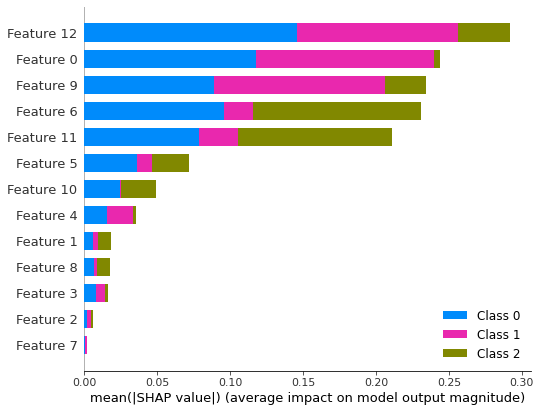

In [29]:

explainer = shap.TreeExplainer(Rf)
# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])


# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)


# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = Rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values

# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values, X_test)